In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Functions

In [10]:
# Function to load and prepare data
def load_data(file_name):
    try:
        data_frame = pd.read_csv(file_name)
        x = np.asanyarray(data_frame[['x']])
        y = np.asanyarray(data_frame[['y']])
        return x, y
    except FileNotFoundError:
        print(f"Error: The file {file_name} was not found.")
        return None, None

# Function to create and train the model
def train_model(x, y):
    model = linear_model.LinearRegression()
    model.fit(x, y)
    return model

# Function to plot data and predictions
def plot_results(x, y, yp, xp_1, yp_1):
    plt.figure(figsize=(8, 6))
    plt.grid(True)
    plt.title('Linear Regression Model', fontsize=16)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    
    plt.plot(x, y, 'bo', label='Samples')
    plt.plot(x, yp, 'r-', lw=2, label='Prediction Line')
    plt.plot(xp_1, yp_1, 'gs', lw=2, markersize=10, label=f'New point: ({xp_1[0][0]}, {yp_1[0][0]:.2f})')
    
    plt.legend(loc='best', fontsize=12)
    plt.show()

# Function to calculate and print metrics
def print_metrics(y, yp,model):
    mae = mean_absolute_error(y, yp)
    mse = mean_squared_error(y, yp)
    r2 = r2_score(y, yp)
    
    print(f"Model Coefficients: Intercept = {model.intercept_[0]:.2f}, Slope = {model.coef_[0][0]:.2f}")
    print(f"MAE = {mae:.5f}")
    print(f"MSE = {mse:.5f}")
    print(f"R² = {r2:.5f}")

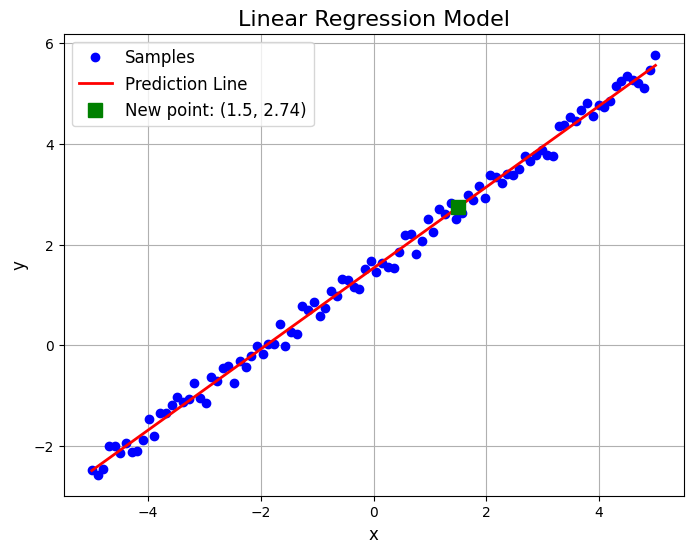

Model Coefficients: Intercept = 1.54, Slope = 0.80
MAE = 0.14290
MSE = 0.02683
R² = 0.99515


In [11]:
# Main code
x, y = load_data("df_regresion_lineal_1.csv")
if x is not None and y is not None:
    model = train_model(x, y)
    
    # Predicting new values
    yp = model.predict(x)
    xp_1 = np.array([[1.5]])
    yp_1 = model.predict(xp_1)
    
    # Plotting the results
    plot_results(x, y, yp, xp_1, yp_1)
    
    # Printing metrics
    print_metrics(y, yp,model)